In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
grav1 = pd.read_csv("Data/Gravity/grav_data.TXT", delim_whitespace=True, skiprows=317, names=['LINE','STATION','ALT.','GRAV.','SD.','TILTX','TILTY','TEMP','TIDE','DUR','REJ','TIME','DEC.TIME+DATE','TERRAIN','DATE'])
diff = pd.read_csv("Data/Gravity/trimble_data/coolcave2.csv", header=None, names=["NAME","NORTH","EAST","ELEV",""])

In [3]:
# Reduce dgps points to only take grav data
keep = [True if len(l) < 3 else False for l in diff['NAME'][:]]
ggps = diff[keep]

In [4]:
# compute station dists
ggps['x'] = np.average(ggps['NORTH']) - ggps['NORTH']
ggps['y'] = np.average(ggps['EAST']) - ggps['EAST']
ggps['r'] = (ggps['x']**2 + ggps['y']**2)**0.5

C:\Users\Nacnu\AppData\Local\Temp\ipykernel_6112\2408517537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggps['x'] = np.average(ggps['NORTH']) - ggps['NORTH']
C:\Users\Nacnu\AppData\Local\Temp\ipykernel_6112\2408517537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ggps['y'] = np.average(ggps['EAST']) - ggps['EAST']
C:\Users\Nacnu\AppData\Local\Temp\ipykernel_6112\2408517537.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [5]:
ggps

,NAME,NORTH,EAST,ELEV,,x,y,r
1,1,4483176.240,343992.127,2055.759,NaN,-6.338174,-5.591826,8.452276
2,2,4483175.464,343991.483,2055.801,NaN,-5.562174,-4.947826,7.444378
3,3,4483174.631,343990.849,2055.933,NaN,-4.729174,-4.313826,6.401108
4,4,4483173.919,343990.222,2056.088,NaN,-4.017174,-3.686826,5.452557
5,5,4483173.231,343989.558,2056.180,NaN,-3.329174,-3.022826,4.496763
6,6,4483172.525,343988.843,2056.340,NaN,-2.623174,-2.307826,3.493866
7,7,4483171.806,343988.180,2056.520,NaN,-1.904174,-1.644826,2.516214
8,8,4483171.472,343987.812,2056.638,NaN,-1.570174,-1.276826,2.023791
9,9,4483171.076,343987.466,2056.683,NaN,-1.174174,-0.930826,1.498373
10,10,4483170.705,343987.136,2056.734,NaN,-0.803174,-0.600826,1.003036


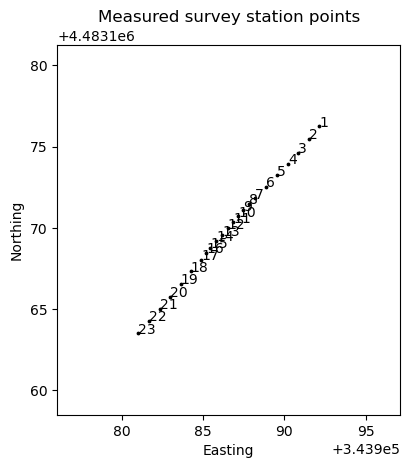

In [7]:
plt.scatter(ggps["EAST"], ggps["NORTH"], c="black", s=3)
plt.title("Measured survey station points")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(np.min(ggps["EAST"]) - 5, np.max(ggps["EAST"]) + 5)
plt.ylim(np.min(ggps["NORTH"]) - 5, np.max(ggps["NORTH"]) + 5)
for i in range(len(ggps)):
    plt.text(ggps["EAST"].iloc[i], ggps["NORTH"].iloc[i], s=ggps["NAME"].iloc[i])
plt.show()

In [7]:
# get average for station 0 for each gravimeter
avg_grav1 = np.average(grav1["GRAV."])
print(f"Grav1 station 0 average: {avg_grav1}")
avg_0 = avg_grav1
# correct gravimeters
grav1["GRAV."] -= avg_grav1
grav1 = grav1[grav1['SD.'] < 0.1]

Grav1 station 0 average: 3551.203521739131


In [8]:
ggps

,NAME,NORTH,EAST,ELEV,,x,y,r
1,1,4486565.814,338058.450,2028.625,NaN,238.308211,-1866.613053,1881.763825
2,2,4486652.365,337840.671,2034.362,NaN,151.757211,-1648.834053,1655.803124
3,3,4486859.301,337640.831,2058.424,NaN,-55.178789,-1448.994053,1450.044297
4,4,4486990.600,337516.903,2074.596,NaN,-186.477789,-1325.066053,1338.123316
5,5,4487062.368,337294.865,2075.729,NaN,-258.245789,-1103.028053,1132.855583
6,6,4487031.030,337060.172,2066.392,NaN,-226.907789,-868.335053,897.492567
7,0,4486694.178,335656.183,2024.716,NaN,109.944211,535.653947,546.820703
8,7,4486966.907,336823.294,2058.810,NaN,-162.784789,-631.457053,652.101907
9,8,4486930.030,336591.769,2054.647,NaN,-125.907789,-399.932053,419.283220
10,9,4486906.669,336355.110,2048.143,NaN,-102.546789,-163.273053,192.805430


### Turn grav station names into integers

In [9]:
grav1['STATION'] = [round(g) for g in grav1['STATION']]

### Merge GPS and grav stations

In [10]:
rads = []
elevs = []
xs, ys = [], []
NS, ES = [], []
for i, row in grav1.iterrows():
    name = f"{row['STATION']}"
    try:
        sel_r = ggps[ggps['NAME'] == name]
        r = sel_r['r'].iloc[0]
        e = sel_r['ELEV'].iloc[0]
        x, y = sel_r['x'].iloc[0], sel_r['y'].iloc[0]
        N, E = sel_r['NORTH'].iloc[0], sel_r['EAST'].iloc[0]
        # make radius value negative for base station and stations after #11
        if row['STATION'] >= 11 or row['STATION'] == 0:
            r *= -1
        rads.append(r)
        elevs.append(e)
        xs.append(x)
        ys.append(y)
        NS.append(N); ES.append(E)
    except IndexError:
        rads.append(None)
        elevs.append(None)
        xs.append(None)
        ys.append(None)
grav1['r'] = rads
grav1['e'] = elevs
grav1['x'] = xs
grav1['y'] = ys
grav1['NORTH'] = NS; grav1['EAST'] = ES

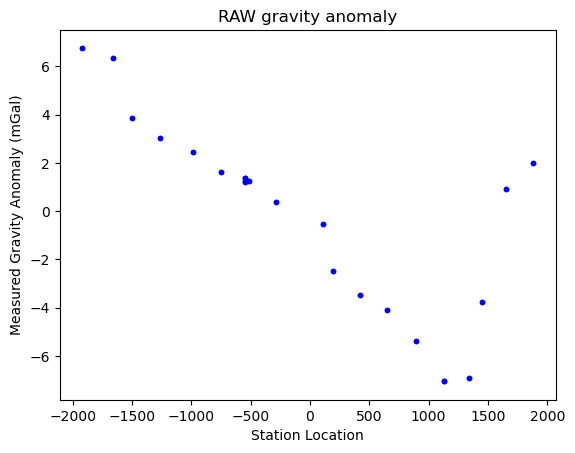

In [11]:
plt.errorbar(grav1["r"], grav1["GRAV."], yerr=grav1["SD."], fmt=".", color="blue")
plt.xlabel("Station Location")
plt.ylabel("Measured Gravity Anomaly (mGal)")
plt.title("RAW gravity anomaly")
plt.show()

In [12]:
# Make new time column
grav1["TIME"] = grav1['DEC.TIME+DATE']

### Perform drift correction

In [13]:
drf_crct_1 = np.interp(grav1["TIME"], [row["TIME"] for i, row in grav1.iterrows() if row['STATION'] == 0], 
                       [row["GRAV."] for i, row in grav1.iterrows() if row['STATION'] == 0])
grav1["GRAV."] += drf_crct_1

[1.18647826 1.18547826 1.19603887 1.19634594 1.20389009 1.20419715
 1.21019996 1.21050703 1.2148842  1.21519127 1.21848468 1.21985142
 1.22015849 1.22488487 1.22519193 1.23047826 1.23447826 1.27779418
 1.27856878 1.28600499 1.28679509 1.29420031 1.29499041 1.30216325
 1.30295335 1.31001775 1.31079236 1.31720609 1.31799618 1.32485918
 1.32563379 1.33195457 1.33274466 1.33850773 1.33929782 1.34509187
 1.34588197 1.36345001 1.36424011 1.37011161 1.37090171 1.38747826
 1.38847826 1.38747826]


### Free air correction

In [14]:
air_crct_1 = [-0.3086 * e for e in grav1['e']]
grav1["GRAV."] += air_crct_1

### Average Duplicate Stations

In [15]:
grav1_stations = np.unique(grav1['STATION'])
grav1_grav = [np.average(grav1[grav1['STATION'] == st]['GRAV.']) for st in grav1_stations]
grav1_rad = [np.average(grav1[grav1['STATION'] == st]['r']) for st in grav1_stations]
grav1_sd = [np.average(grav1[grav1['STATION'] == st]['SD.']) for st in grav1_stations]
grav1_elev = [np.average(grav1[grav1['STATION'] == st]['e']) for st in grav1_stations]
grav1_x = [np.average(grav1[grav1['STATION'] == st]['x']) for st in grav1_stations]
grav1_y = [np.average(grav1[grav1['STATION'] == st]['y']) for st in grav1_stations]
grav1_N = [np.average(grav1[grav1['STATION'] == st]['NORTH']) for st in grav1_stations]
grav1_E = [np.average(grav1[grav1['STATION'] == st]['EAST']) for st in grav1_stations]
grav1_red = pd.DataFrame({'STAT': grav1_stations, 'GRAV': grav1_grav, 'SD': grav1_sd, 'ELEV': grav1_elev, 'r':grav1_rad, 'x':grav1_x, 'y':grav1_y, 'NORTH':grav1_N, 'EAST':grav1_E})

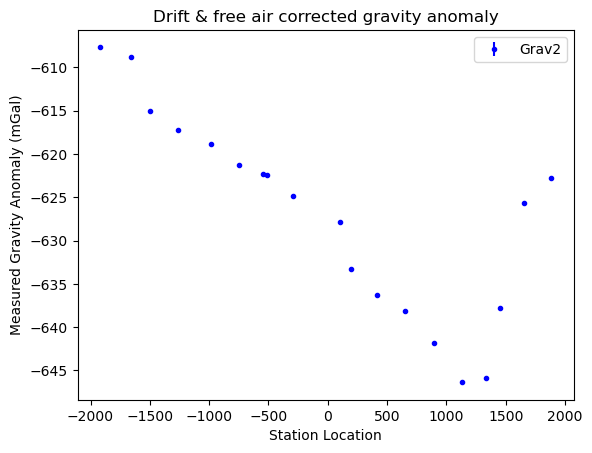

In [16]:
#avg = (np.sum(grav1_red["GRAV"]) + np.sum(grav2_red["GRAV"])) / (len(grav1_red["GRAV"]) + len(grav2_red["GRAV"]))
plt.errorbar(grav1_red["r"], grav1_red["GRAV"], yerr=grav1_red["SD"], fmt=".", color="blue", label="Grav2")
#plt.errorbar(grav2_red["STAT"], grav2_red["GRAV"] - avg, yerr=grav2_red["SD"], color="red", fmt=".", label="Grav1")
plt.legend()
plt.xlabel("Station Location")
plt.ylabel("Measured Gravity Anomaly (mGal)")
plt.title("Drift & free air corrected gravity anomaly")
plt.show()

### Bouger Correction

In [17]:
bg_crct_1 = [2*np.pi*(6.67408e-3)*2.670*e for e in grav1_red['ELEV']]
grav1_red["GRAV"] += bg_crct_1

In [18]:
grav1_red["GRAV"] -= np.average(grav1_red["GRAV"][~np.isnan(grav1_red["GRAV"])])

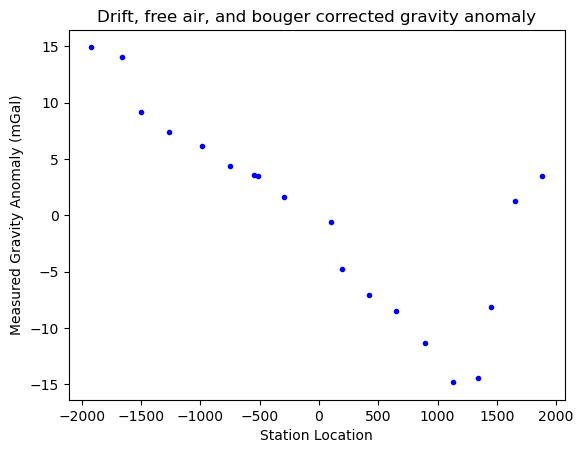

In [19]:
plt.errorbar(grav1_red["r"], grav1_red["GRAV"], yerr=grav1_red["SD"], fmt=".", color="blue", label="Grav2")
plt.title("Drift, free air, and bouger corrected gravity anomaly")
plt.xlabel("Station Location")
plt.ylabel("Measured Gravity Anomaly (mGal)")
plt.show()

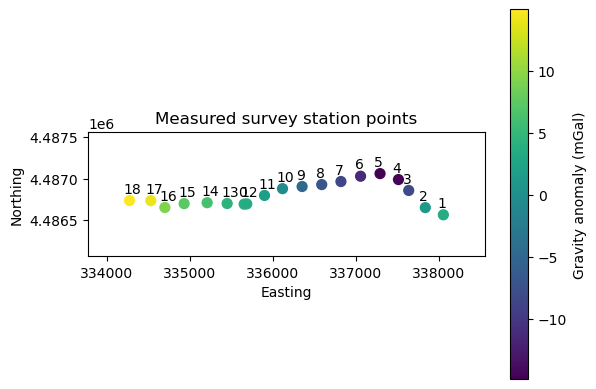

In [23]:
plt.scatter(grav1_red["EAST"], grav1_red["NORTH"], c=grav1_red['GRAV'], s=50)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Measured survey station points")
plt.xlabel("Easting")
plt.ylabel("Northing")
plt.xlim(np.min(ggps["EAST"]) - 500, np.max(ggps["EAST"]) + 500)
plt.ylim(np.min(ggps["NORTH"]) - 500, np.max(ggps["NORTH"]) + 500)
for i in range(len(ggps)):
    plt.text(ggps["EAST"].iloc[i]-70, ggps["NORTH"].iloc[i]+90, s=ggps["NAME"].iloc[i])
plt.colorbar(label="Gravity anomaly (mGal)")
plt.show()

In [24]:
grav1_red.to_csv("corrected_grav.csv")

In [25]:
grav1_red

,STAT,GRAV,SD,ELEV,r,x,y,NORTH,EAST
0,0,3.605797,0.029143,2024.716,-546.820703,109.944211,535.653947,4486694.178,335656.183
1,1,3.472794,0.016500,2028.625,1881.763825,238.308211,-1866.613053,4486565.814,338058.450
2,2,1.261051,0.036500,2034.362,1655.803124,151.757211,-1648.834053,4486652.365,337840.671
3,3,-8.140569,0.027500,2058.424,1450.044297,-55.178789,-1448.994053,4486859.301,337640.831
4,4,-14.479365,0.013000,2074.596,1338.123316,-186.477789,-1325.066053,4486990.600,337516.903
5,5,-14.808359,0.065000,2075.729,1132.855583,-258.245789,-1103.028053,4487062.368,337294.865
6,6,-11.317172,0.020000,2066.392,897.492567,-226.907789,-868.335053,4487031.030,337060.172
7,7,-8.504142,0.041000,2058.810,652.101907,-162.784789,-631.457053,4486966.907,336823.294
8,8,-7.045333,0.038500,2054.647,419.283220,-125.907789,-399.932053,4486930.030,336591.769
9,9,-4.767224,0.036000,2048.143,192.805430,-102.546789,-163.273053,4486906.669,336355.110
